# FacetGrid Practice

In [190]:
import seaborn as sns

In [191]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## total_bill: hesap
## tip: bahşiş
## sex: cinsiyet
## smoker: sigara kullanılıyor mu?
## time: sabah/akşam
## day: günler
## size: kaç kişilik gruplar?

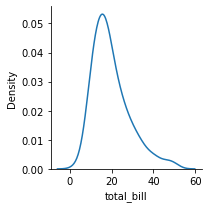

In [192]:
sns.FacetGrid(data=df).map(sns.kdeplot, 'total_bill');

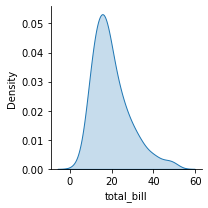

In [193]:
sns.FacetGrid(data=df).map(sns.kdeplot, 'total_bill', shade=True);

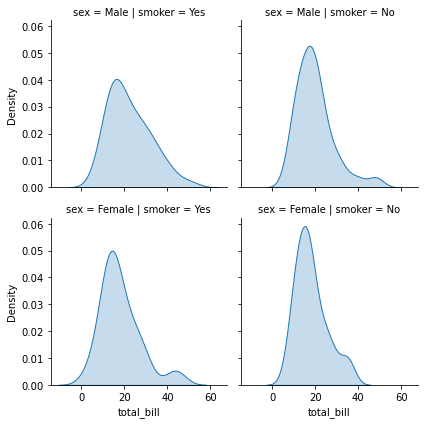

In [194]:
sns.FacetGrid(data=df, col='smoker', row='sex').map(sns.kdeplot, 'total_bill', shade=True);

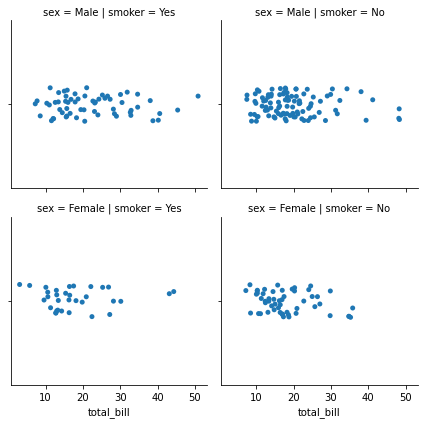

In [195]:
sns.FacetGrid(data=df, col='smoker', row='sex').map_dataframe(sns.stripplot, 'total_bill');

In [196]:
?sns.stripplot

Signature:
sns.stripplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    jitter=True,
    dodge=False,
    orient=None,
    color=None,
    palette=None,
    size=5,
    edgecolor='gray',
    linewidth=0,
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement
to a box or violin plot in cases where you want to show all observations
along with some representation of the underlying distribution.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
  variables will determine how the data are plotted.
- A "wide-form" DataFrame, such that each numeric column will be plotted.
- An array or list of vectors.

I

In [197]:
df.total_bill.mean(), df.total_bill.min(), df.total_bill.max()

(19.785942622950824, 3.07, 50.81)

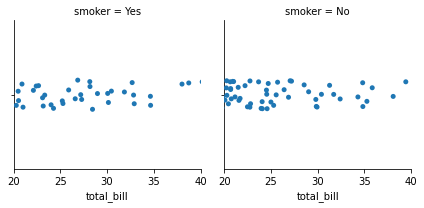

In [198]:
sns.FacetGrid(data=df, xlim=(20,40), col='smoker').map_dataframe(sns.stripplot, 'total_bill');
# hesap değişkenininin 20 ile 40 değerleri arasındaki verilerini çizdik.

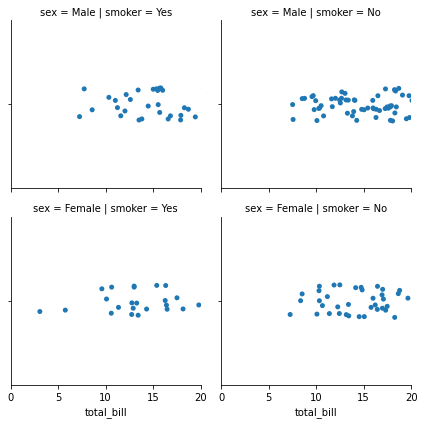

In [199]:
sns.FacetGrid(data=df, xlim=(0,20), col='smoker', row='sex').map_dataframe(sns.stripplot, 'total_bill');

In [200]:
# Aslında FacetGrid fonksiyonu; bir veri seti içerisinde slicing işlemi tarzında belirli bir veri grubunu kesip
# onun üzerinde çalışmak veya grafiğini çizmek için gayet kullanışlı. xlim parametresi ile bu kesme işlemini yapabiliriz.

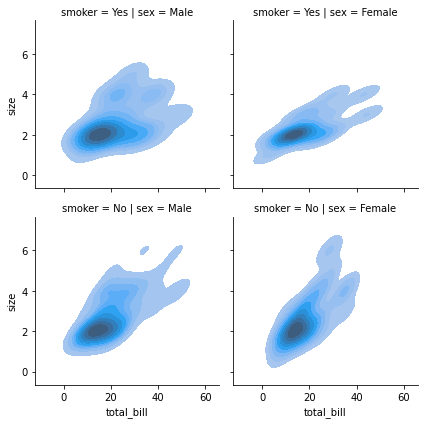

In [201]:
sns.FacetGrid(data=df, col='sex', row='smoker').map_dataframe(sns.kdeplot, 'total_bill', 'size', shade=True);
# Aşağıdaki grafikte yoğunluk fazla ise koyu renkle, yoğunluk az ise açık renkle gösterilmiştir.
# Grafikten görüleceği üzere total_bill değişkeninin 0 ile 20 değerleri arasında yoğunluk en fazla düzeydedir.
# Grafiğin y düzlemini incelediğimizde ise en yoğun bölgeler size=2 'ye denk gelmektedir.

In [202]:
df.groupby(['smoker', 'sex'])[['size', 'total_bill']].mean().T
# Yukarıdaki kdeplot grafiğimiz üzerinde ortalama size değerini 3 olarak tahmin etmiştim.
# Sağlaması olarak da 2.2 ile 2.6 arasında değiştiğini görüyoruz. Fena değil :)

smoker          Yes                    No           
sex            Male     Female       Male     Female
size         2.5000   2.242424   2.711340   2.592593
total_bill  22.2845  17.977879  19.791237  18.105185

In [203]:
#sns.FacetGrid(data=df, col='smoker', row='sex').map_dataframe(sns.catplot, 'size');
# Yukarıdaki kod satırını çalıştırınca hata alıyoruz. Yukarıda yapmamız gereken işlemi catplot ile değil stripplot ile yapabileceğimizi öğrendik.

In [204]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Soruları FacetGrid fonksiyonu ile grafikler üzerinden çözelim.

## Soru1: Maksimum hesap ne kadar ?

C:\Users\murat\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


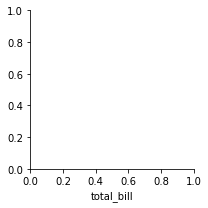

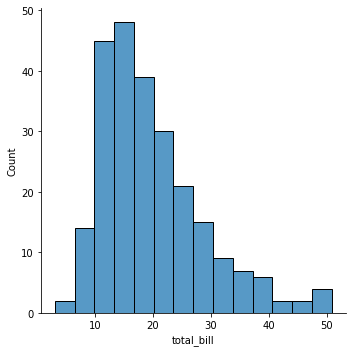

In [205]:
sns.FacetGrid(data=df).map_dataframe(sns.displot, x='total_bill');
# Aşağıdaki grafiğe bakarak maksimum hesap değerinin 49-54 dolar aralığında olduğunu görüyoruz.

In [206]:
# Soru1 'in sağlamasını yapalım.
df.total_bill.max()
# Çok az yanılma payının olduğunu görüyoruz. tanecikli grafikler ile nokta atışı sonuç almaya çalışalım.

50.81

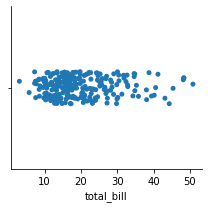

In [207]:
sns.FacetGrid(data=df).map_dataframe(sns.stripplot, 'total_bill');
# Biraz daha detaya inmeye çalışalım!

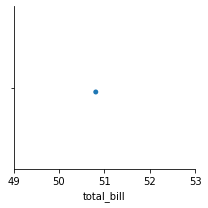

In [208]:
sns.FacetGrid(data=df, xlim=(49,53)).map_dataframe(sns.stripplot, 'total_bill');
# Görüldüğü üzere 50.80 gibi bir sonuç çıkıyor :)

## Soru2: Cinsiyet kategorisinde > Kadınlar sınıfında maksimum hesap nedir ?

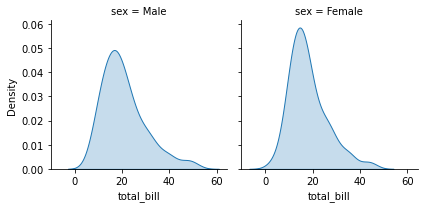

In [209]:
sns.FacetGrid(data=df, col='sex').map_dataframe(sns.kdeplot, x='total_bill', shade=True);
# 50 gibi gözüküyor. Fakat daha detaya inmemiz gerekiyor.

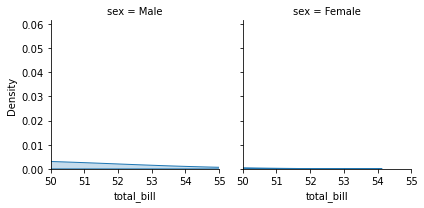

In [210]:
sns.FacetGrid(data=df, col='sex', xlim=(50,55)).map_dataframe(sns.kdeplot, 'total_bill', shade=True);
# Görüldüğü üzere kadınlarda maksimum hesap 54 küsur olarak gözüküyor. Aşağıda tanecikli grafik ile de görelim.

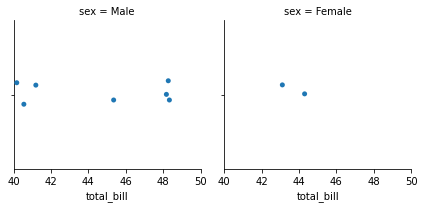

In [211]:
sns.FacetGrid(data=df, col='sex', xlim=(40,50)).map_dataframe(sns.stripplot, 'total_bill');
# Değişik bir sonuç çıktı. Sağlamasını yaparak gerçek cevabı görelim.

In [212]:
df.groupby('sex')[['total_bill']].max()
# Kadınlar sınıfında maksimum hesap 44.30 dolar çıktı. Tanecikli grafikte doğru cevabı elde ettik. Fakat yoğunluk(kdeplot) grafiğinde bir sapma oldu. 
# Bu yüzden doğru sonucu elde etmek için birden fazla yöntem denenmeli. Sağlaması yapılmalı.

,total_bill
sex,
Male,50.81
Female,44.30


## Soru3: Cinsiyet kategorisinde > Erkekler sınıfında Maksimum hesap nedir ?

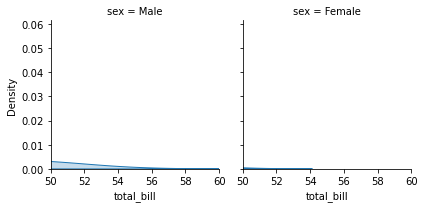

In [213]:
sns.FacetGrid(data=df, col='sex', xlim=(50,60)).map_dataframe(sns.kdeplot, 'total_bill', shade=True);
# Anlaşılacağı üzere yoğunluk grafiği ile nokta atışı sonuca ulaşmak zor gibi gözüküyor. Tanecikli grafikler ile bulalım.

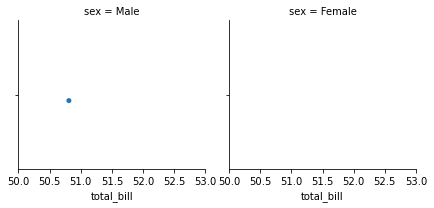

In [214]:
sns.FacetGrid(data=df, col='sex', xlim=(50,53)).map_dataframe(sns.stripplot, 'total_bill');
# Görüldüğü üzere Erkekler sınıfında maksimum hesap yaklaşık olarak 50.80 gibi gözüküyor.
# Sağlamasını yapalım.

In [215]:
df.groupby('sex')[['total_bill']].max()
# Erkekler sınıfında maksimum hesap 50.81 dolar.

,total_bill
sex,
Male,50.81
Female,44.30


In [216]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [217]:
# Soru1: En çok ödeme kadınlar tarafından mı yapıldı yoksa erkekler tarafından mı ?
# Soru2: En çok erkekler mi sigara kullanıyor yoksa kadınlar mı ?
# Soru3: Hangi günlerde en çok ödemeyi hangi cinsiyet yapmış ?
# Soru4: Hangi günlerde ortalama ne kadar tip verilmiş ?
# Soru5: Günlerde maksimum ne kadar tip verilmiş ?
# Soru6: Cinsiyetlere göre tip grafiğini oluştur.
# Soru7: Günlere göre hangi cinsiyet ne kadar tip vermiş ?
# Soru8: Sigara içenlerin tip verme oranlarının grafiğini çiz.
# Soru9: En çok hangi gruplar hesap ödüyor?
# Soru10: Hangi grup en yüksek hesabı ödedi?
# Soru11: Gündüz ve Gece ciro ortalamalarımızı hesapla.
# Soru12: Kadınlar en fazla günün hangi zamanında restoranımıza geliyorlar ?
# Soru13: Cinsiyetlerin sigara kullanma oranlarını hesapla.
# Soru14: Sigara içenler günün hangi vaktinde restoranımıza geliyorlar ?

## Soru4: En çok ödeme kadınlar tarafından mı yapıldı yoksa erkekler tarafından mı ?

C:\Users\murat\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


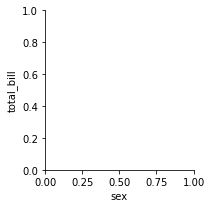

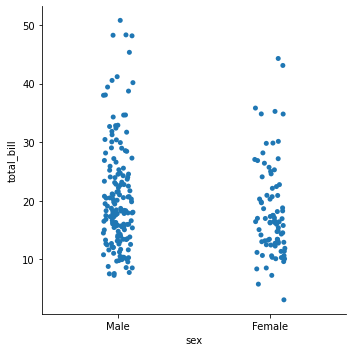

In [218]:
sns.FacetGrid(data=df).map_dataframe(sns.catplot, x='sex', y='total_bill');
# Aşağıda görüldüğü üzere en çok ödeme erkekler tarafından yapılmış.

In [219]:
# Sağlamasını yapalım.
df.groupby('sex')[['total_bill']].max()
# Maksimum hesap Erkekler tarafından ödenmiş ve 50.81 dolar.

,total_bill
sex,
Male,50.81
Female,44.30


## Soru5: En çok erkekler mi sigara kullanıyor yoksa kadınlar mı ?

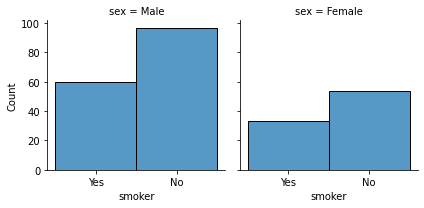

In [220]:
sns.FacetGrid(data=df, col='sex').map_dataframe(sns.histplot, x='smoker');
# Histogram grafiğinden görüldüğü üzere erkeklerde sigara kullananlar 50-62 aralığında, kadınlarda sigara kullananlar ise 20-40 aralığında. Tabiki yaklaşık olarak.
# Sağlamasını yapalım.

In [221]:
df.groupby(['smoker', 'sex'])[['total_bill']].count().T
# Erkeklerde sigara kullanan 60 kişi var.
# Kadınlarda sigara kullanan 33 kişi var.

smoker      Yes          No       
sex        Male Female Male Female
total_bill   60     33   97     54

## Soru6: Hangi günlerde en çok ödemeyi hangi cinsiyet yapmış ?

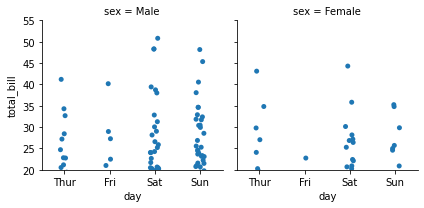

In [222]:
sns.FacetGrid(data=df, col='sex', ylim=(20,55)).map_dataframe(sns.stripplot, x='day', y='total_bill');

In [223]:
# Perşembe günü: Kadın > 40-45 dolar aralığında.
# Cuma günü: Erkek > 37-41 dolar aralığında.
# Cumartesi günü: Erkek > 50-55 dolar aralığında.
# Pazar günü: Erkek > 45-50 dolar aralığında.
# Sağlamasını yapalım.

In [224]:
df.groupby(['day', 'sex'])[['total_bill']].max().T

day          Thur           Fri           Sat           Sun       
sex          Male Female   Male Female   Male Female   Male Female
total_bill  41.19  43.11  40.17  22.75  50.81   44.3  48.17  35.26

## Soru7: Hangi günlerde ortalama ne kadar tip verilmiş ?

C:\Users\murat\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


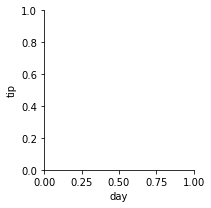

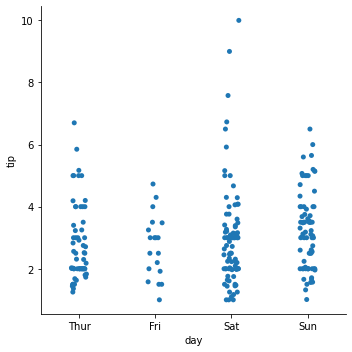

In [225]:
sns.FacetGrid(data=df).map_dataframe(sns.catplot, x='day', y='tip');
# catplot grafiğine bakarak tamamen tahmini ortalama verilebilir.

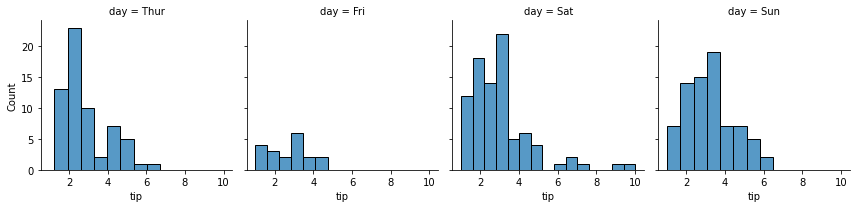

In [226]:
sns.FacetGrid(data=df, col='day').map_dataframe(sns.histplot, x='tip');
# 7 soru için en uygun grafik histoğram grafiği gibi duruyor. Ortalama için histogram grafiğide cevap veremez fakat tanecikli grafiğe göre daha anlamlı oldu.

In [227]:
df.groupby('day')[['tip']].mean().T
# 7. sorunun cevabı.

day,Thur,Fri,Sat,Sun
tip,2.771452,2.734737,2.993103,3.255132


## Soru8: Günlerde maksimum ne kadar tip verilmiş ?

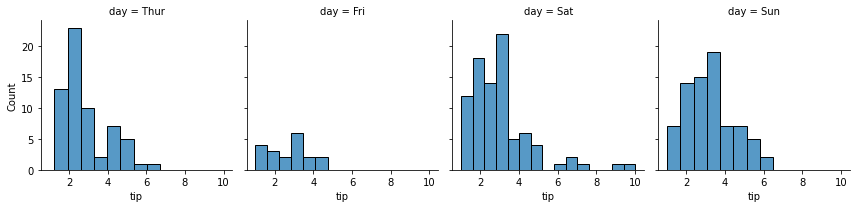

In [228]:
sns.FacetGrid(data=df, col='day').map_dataframe(sns.histplot, x='tip');
# Histogram grafiğine göre yaklaşık olarak;
# Perşembe günü: 7 dolar.
# Cuma günü: 5 dolar.
# Cumartesi günü: 9.5 dolar.
# Pazar günü: 7 dolar.

In [229]:
df.groupby('day')[['tip']].max().T
# Yorumlarımız ve cevaplar neredeyse eşleşiyor.

day,Thur,Fri,Sat,Sun
tip,6.7,4.73,10.0,6.5


## Soru9: Cinsiyetlere göre tip grafiğini oluştur.

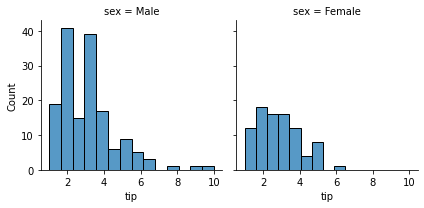

In [230]:
sns.FacetGrid(data=df, col='sex').map_dataframe(sns.histplot, 'tip');

In [231]:
df.groupby('sex')[['tip']].describe().T

sex              Male     Female
tip count  157.000000  87.000000
    mean     3.089618   2.833448
    std      1.489102   1.159495
    min      1.000000   1.000000
    25%      2.000000   2.000000
    50%      3.000000   2.750000
    75%      3.760000   3.500000
    max     10.000000   6.500000

## Soru10: Günlere göre hangi cinsiyet ne kadar tip vermiş ?

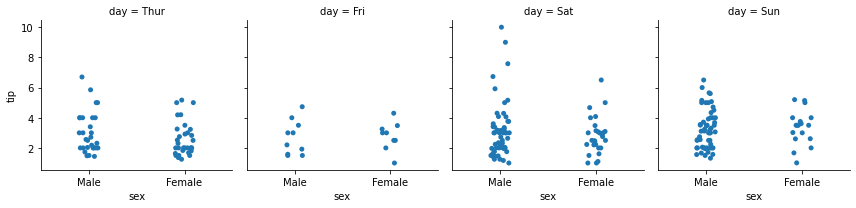

In [232]:
sns.FacetGrid(data=df, col='day').map_dataframe(sns.stripplot, x='sex', y='tip');

In [233]:
df.groupby(['day', 'sex'])[['tip']].count().T

day Thur         Fri         Sat         Sun       
sex Male Female Male Female Male Female Male Female
tip   30     32   10      9   59     28   58     18

## Soru11: Sigara içenlerin tip verme oranlarının grafiğini çiz.

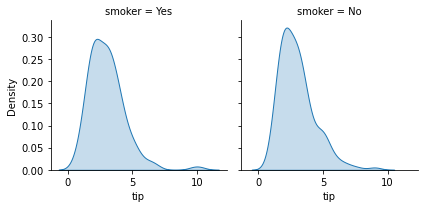

In [234]:
sns.FacetGrid(data=df, col='smoker').map_dataframe(sns.kdeplot, x='tip', shade=True);

In [235]:
df.groupby('smoker')[['tip']].count().T

smoker,Yes,No
tip,93,151


## Soru12: En çok hangi gruplar hesap ödüyor?

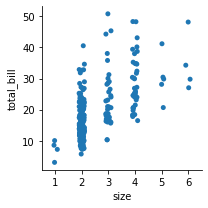

In [236]:
sns.FacetGrid(data=df).map_dataframe(sns.stripplot, x='size', y='total_bill');

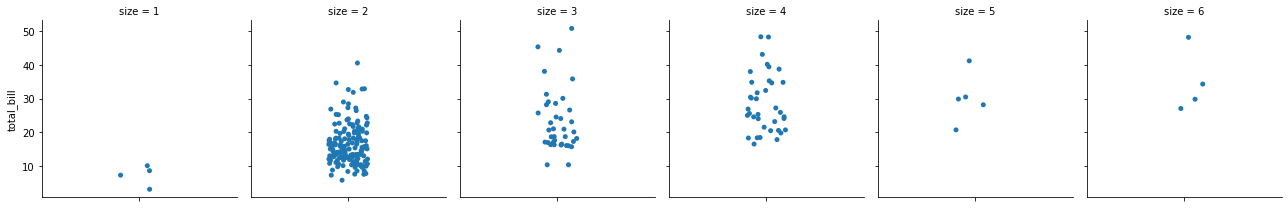

In [237]:
sns.FacetGrid(data=df, col='size').map_dataframe(sns.stripplot, y='total_bill');
# En çok 2 kişilik gruplar ödeme yapıyor. Yani restoranımıza en çok 2 kişilik grup geliyor.

In [238]:
df.groupby('size')[['total_bill']].count().T

size,1,2,3,4,5,6
total_bill,4,156,38,37,5,4


## Soru13: Hangi grup en yüksek hesabı ödedi?

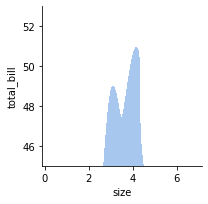

In [239]:
sns.FacetGrid(data=df, ylim=(45,53)).map_dataframe(sns.kdeplot, x='size', y='total_bill', shade=True);
# Yoğunluk grafiğine bakılırsa 4 kişilik gruplardan birtanesi 51 dolar ödedi.

In [240]:
df.groupby('size')[['total_bill']].max().T
# Yoğunluk grafiğine bakarak yaptığım tahmin yanlış çıktı :/
# 3 kişilik gruplardan birtanesi 50.81 dolar ödemiş.

size,1,2,3,4,5,6
total_bill,10.07,40.55,50.81,48.33,41.19,48.17


## Soru14: Gündüz ve Gece ciro ortalamalarımızı hesapla.

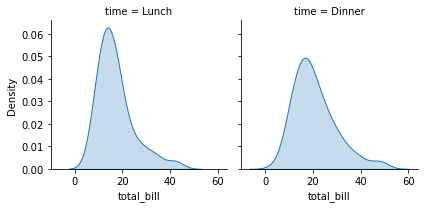

In [241]:
sns.FacetGrid(data=df, col='time').map_dataframe(sns.kdeplot, x='total_bill', shade=True);
# Yoğunluk grafiği net olarak birşey söyleyemese de ortalama hakkında bilgi sahibi olmamızı sağladı.

In [242]:
df.groupby('time')[['total_bill']].mean().T

time,Lunch,Dinner
total_bill,17.168676,20.797159


## Soru15: Kadınlar en fazla günün hangi zamanında restoranımıza geliyorlar ?

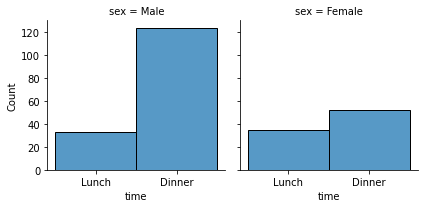

In [243]:
sns.FacetGrid(data=df, col='sex').map_dataframe(sns.histplot, x='time');
# Kadınlar en çok akşam geliyorlar.

## Soru16: Cinsiyetlerin sigara kullanma oranlarını hesapla.

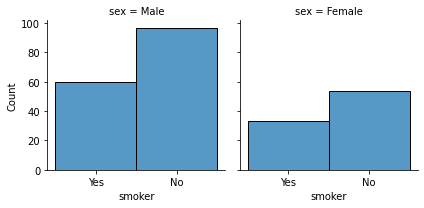

In [244]:
sns.FacetGrid(data=df, col='sex').map_dataframe(sns.histplot, x='smoker');

## Soru17: Sigara içenler günün hangi vaktinde restoranımıza geliyorlar ?

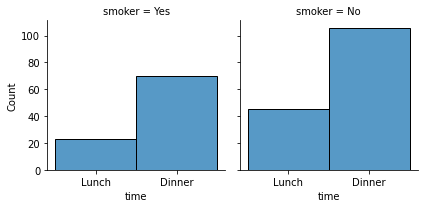

In [245]:
sns.FacetGrid(data=df, col='smoker').map_dataframe(sns.histplot, x='time');
# en çok akşam vakti geliyorlar.